In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

In [6]:
y_train.shape

(33600, 10)

In [11]:
classifier1 = Sequential()

In [12]:
classifier1.add(Dense(16,activation='relu'))
classifier1.add(Dense(16,activation='relu'))
classifier1.add(Dense(10,activation='sigmoid'))

In [13]:
opt = tf.keras.optimizers.Adam(clipvalue = 0.5)

In [14]:
classifier1.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
eps=100
model_val = classifier1.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 2.4854 - accuracy: 0.5259 - val_loss: 1.0430 - val_accuracy: 0.6771
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 0.9441 - accuracy: 0.7092 - val_loss: 0.8554 - val_accuracy: 0.7582
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 0.7695 - accuracy: 0.7751 - val_loss: 0.7283 - val_accuracy: 0.7945
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.8070 - val_loss: 0.6713 - val_accuracy: 0.8254
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6580 - accuracy: 0.8238 - val_loss: 0.6562 - val_accuracy: 0.8216
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6242 - accuracy: 0.8351 - val_loss: 0.6374 - val_accuracy: 0.8296
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.8453 - val_loss: 0.6415 - val_accuracy: 0.8536

840/840 [==============================] - 2s 2ms/step - loss: 0.6215 - accuracy: 0.8200 - val_loss: 0.8520 - val_accuracy: 0.7854
Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.6097 - accuracy: 0.8201 - val_loss: 0.8211 - val_accuracy: 0.8082
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.8194 - val_loss: 0.8565 - val_accuracy: 0.7793
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6149 - accuracy: 0.8176 - val_loss: 0.8077 - val_accuracy: 0.7808
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6118 - accuracy: 0.8139 - val_loss: 0.8490 - val_accuracy: 0.7668
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.8048 - val_loss: 0.9014 - val_accuracy: 0.7582
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6250 - accuracy: 0.8016 - val_loss: 0.8365 - val_accuracy: 0.7612
Epoch

In [16]:
classifier2 = Sequential()

classifier2.add(Dense(16,activation='relu'))
classifier2.add(Dense(16,activation='relu'))
classifier2.add(Dense(10,activation='sigmoid'))

opt2 = tf.keras.optimizers.Adam(clipnorm = 1.0)

classifier2.compile(optimizer=opt2,loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
eps=100
model_norm = classifier2.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
840/840 [==============================] - 2s 2ms/step - loss: 2.5610 - accuracy: 0.3799 - val_loss: 1.4145 - val_accuracy: 0.3902
Epoch 2/100
840/840 [==============================] - 1s 2ms/step - loss: 1.2858 - accuracy: 0.4757 - val_loss: 1.1938 - val_accuracy: 0.5292
Epoch 3/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1832 - accuracy: 0.5240 - val_loss: 1.2147 - val_accuracy: 0.5461
Epoch 4/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1649 - accuracy: 0.5406 - val_loss: 1.1848 - val_accuracy: 0.5449
Epoch 5/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1699 - accuracy: 0.5424 - val_loss: 1.1598 - val_accuracy: 0.5585
Epoch 6/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1675 - accuracy: 0.5487 - val_loss: 1.1463 - val_accuracy: 0.5693
Epoch 7/100
840/840 [==============================] - 1s 2ms/step - loss: 1.1423 - accuracy: 0.5661 - val_loss: 1.1735 - val_accuracy: 0.5796

Epoch 58/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6612 - accuracy: 0.7500 - val_loss: 0.7485 - val_accuracy: 0.7246
Epoch 59/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6575 - accuracy: 0.7547 - val_loss: 0.7279 - val_accuracy: 0.7469
Epoch 60/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6365 - accuracy: 0.7777 - val_loss: 0.6958 - val_accuracy: 0.7729
Epoch 61/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6170 - accuracy: 0.7977 - val_loss: 0.7253 - val_accuracy: 0.7766
Epoch 62/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.8022 - val_loss: 0.6910 - val_accuracy: 0.7884
Epoch 63/100
840/840 [==============================] - 1s 2ms/step - loss: 0.6083 - accuracy: 0.8019 - val_loss: 0.6665 - val_accuracy: 0.7966
Epoch 64/100
840/840 [==============================] - 1s 2ms/step - loss: 0.5997 - accuracy: 0.8091 - val_loss: 0.6656 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

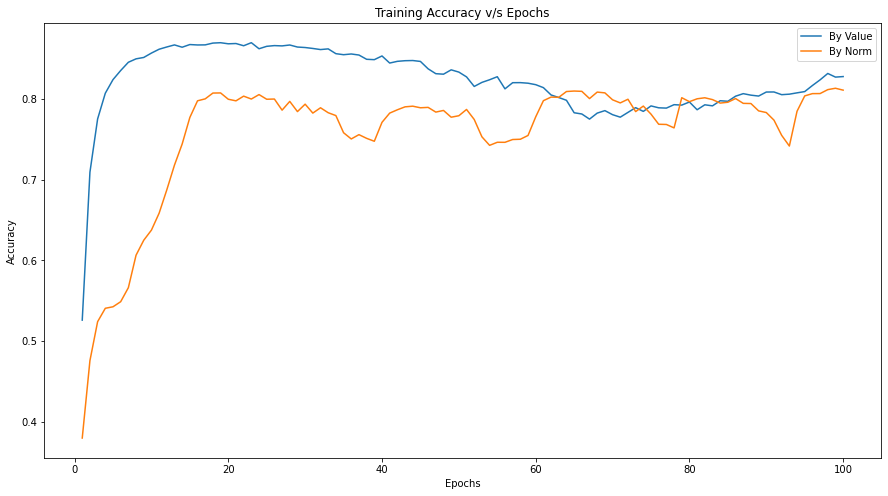

In [20]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy1 = model_val.history['accuracy']
train_accuracy2 = model_norm.history['accuracy']
sns.lineplot(epochs, train_accuracy1, label ='By Value',linewidth=1.5)
sns.lineplot(epochs, train_accuracy2, label ='By Norm',linewidth=1.5)
plt.title('Training Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')